# Q1.

In [ ]:
# !pip install yfinance -q

     |████████████████████████████████| 6.4 MB 7.2 MB/s 


In [ ]:
import numpy
import pandas
import yfinance
import tensorflow
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler


train_data = yfinance.download("BTC-USD", start="2014-01-01", end="2021-09-01")
test_data = yfinance.download("BTC-USD", start="2021-09-01")

print(train_data)
print(type(train_data))
print("----------------------")

print("Shape of train_data:{}".format(train_data.shape))
print("Shape of test_data:{}".format(test_data.shape))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                    Open          High  ...     Adj Close       Volume
Date                                    ...                           
2017-11-09   7446.830078   7446.830078  ...   7143.580078   3226249984
2017-11-10   7173.729980   7312.000000  ...   6618.140137   5208249856
2017-11-11   6618.609863   6873.149902  ...   6357.600098   4908680192
2017-11-12   6295.450195   6625.049805  ...   5950.069824   8957349888
2017-11-13   5938.250000   6811.189941  ...   6559.490234   6263249920
...                  ...           ...  ...           ...          ...
2021-08-28  49072.585938  49283.503906  ...  48902.402344  28568103401
2021-08-29  48911.250000  49644.113281  ...  48829.832031  25889650240
2021-08-30  48834.851562  48925.605469  ...  47054.984375  31847007016
2021-08-31  47024.339844  48189.550781  ...  47166.687500  34730363427
2021-09-01

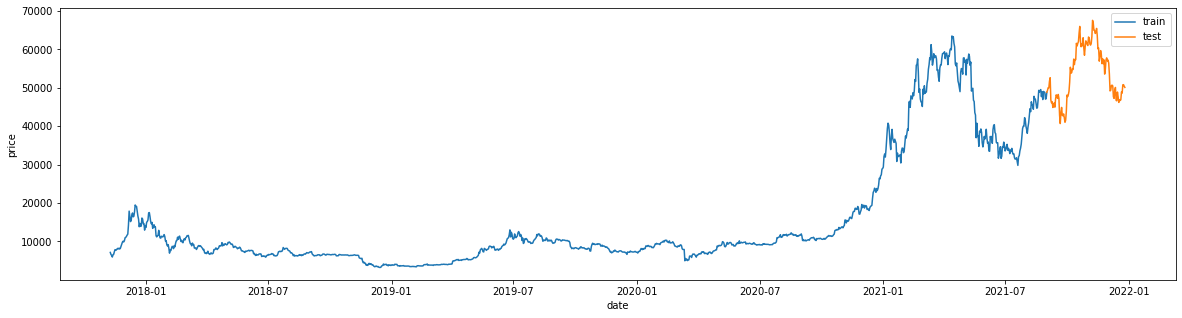

In [ ]:
pyplot.figure(figsize=(20,5))

pyplot.plot(train_data.Close)
pyplot.plot(test_data.Close)

pyplot.ylabel('price')
pyplot.xlabel('date')
pyplot.legend(['train', 'test'])

In [ ]:
train_data = numpy.array([train_data.Close.values])
test_data = numpy.array([test_data.Close.values])
print(train_data.shape)
print(test_data.shape)


train_data = numpy.reshape(train_data, (train_data.shape[1], 1))
test_data = numpy.reshape(test_data, (test_data.shape[1], 1))
print(train_data.shape)
print(test_data.shape)


scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

test_info = test_data.copy()


train_data = numpy.reshape(train_data, (train_data.shape[0]))
test_data = numpy.reshape(test_data, (test_data.shape[0]))


print(train_data)
print(test_data)

(1, 1393)
(1, 117)
(1393, 1)
(117, 1)
[0.0648255  0.05610692 0.0517838  ... 0.72707193 0.72892541 0.75680715]
[0.30340138 0.32128895 0.34724989 0.34424503 0.41155329 0.44430438
 0.22764181 0.20085901 0.21202373 0.15592642 0.16774293 0.19981257
 0.15887226 0.23811186 0.27844414 0.26382032 0.24462496 0.28224033
 0.24435328 0.08001015 0.         0.10720112 0.15634273 0.07985941
 0.07527654 0.09358274 0.05738272 0.0126843  0.0323999  0.11525327
 0.27623353 0.26114586 0.27932255 0.31329509 0.40267463 0.54581514
 0.4879334  0.49395663 0.53118245 0.52386494 0.62482857 0.57110467
 0.62171425 0.61875315 0.77773806 0.75162391 0.77623723 0.79381838
 0.87702091 0.94142882 0.80066885 0.74418474 0.77028333 0.75306238
 0.83154176 0.73196166 0.66195103 0.74157511 0.80133096 0.7887112
 0.76750509 0.75580007 0.83848468 0.82894522 0.77246444 0.76031274
 0.77526464 0.84222767 1.         0.97785894 0.90430607 0.9026215
 0.87307456 0.88474367 0.92185553 0.85081925 0.72442451 0.73211865
 0.60463546 0.6484502

In [ ]:
test_x = []
test_y = []
for count in range(60, test_data.shape[0]):
  test_x.append(test_data[count-60:count])
  test_y.append(test_data[count])

train_x = []
train_y = []
for count in range(60, train_data.shape[0]):
  train_x.append(train_data[count-60:count])
  train_y.append(train_data[count])


train_x = numpy.array(train_x)
train_y = numpy.array(train_y)

test_x = numpy.array(test_x)
test_y = numpy.array(test_y)


train_x, test_x = numpy.reshape(train_x, (train_x.shape[0],
                                          train_x.shape[1], 1)),\
                                           numpy.reshape(test_x,
                                                         (test_x.shape[0],
                                                          test_x.shape[1], 1))
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1333, 60, 1)
(1333,)
(57, 60, 1)
(57,)


In [ ]:
def build_model(name):
  model = tensorflow.keras.Sequential(
     name=name, 
     layers = [tensorflow.keras.layers.LSTM(50, activation='relu', return_sequences=True,
                                  input_shape=(train_x.shape[1], train_x.shape[2])),
     tensorflow.keras.layers.Dropout(0.2),
     tensorflow.keras.layers.LSTM(50, activation='relu', return_sequences=True),
     tensorflow.keras.layers.Dropout(0.2),
     tensorflow.keras.layers.LSTM(50, activation='relu', return_sequences=True),
     tensorflow.keras.layers.Dropout(0.2),
     tensorflow.keras.layers.LSTM(50, activation='relu', return_sequences=False),
     tensorflow.keras.layers.Flatten(),
     tensorflow.keras.layers.Dense(1)]
    )
  return model

model = build_model('question_1')
model.summary()

Model: "question_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_15 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)                2

In [ ]:
model.compile('adam', 'mean_squared_error', metrics=['accuracy'])
history = model.fit(train_x, train_y, 32, 100,
                    callbacks=tensorflow.keras.callbacks.\
                    TensorBoard(log_dir='logs/model'))

Epoch 1/100
42/42 [==============================] - 10s 129ms/step - loss: 0.0330 - accuracy: 0.0015
Epoch 2/100
42/42 [==============================] - 5s 128ms/step - loss: 0.0051 - accuracy: 0.0015
Epoch 3/100
42/42 [==============================] - 5s 128ms/step - loss: 0.0035 - accuracy: 0.0015
Epoch 4/100
42/42 [==============================] - 5s 126ms/step - loss: 0.0029 - accuracy: 0.0015
Epoch 5/100
42/42 [==============================] - 6s 145ms/step - loss: 0.0031 - accuracy: 0.0015
Epoch 6/100
42/42 [==============================] - 5s 127ms/step - loss: 0.0023 - accuracy: 0.0015
Epoch 7/100
42/42 [==============================] - 5s 127ms/step - loss: 0.0026 - accuracy: 0.0015
Epoch 8/100
42/42 [==============================] - 5s 125ms/step - loss: 0.0022 - accuracy: 0.0015
Epoch 9/100
42/42 [==============================] - 5s 126ms/step - loss: 0.0025 - accuracy: 0.0015
Epoch 10/100
42/42 [==============================] - 5s 125ms/step - loss: 0.0024 - accur

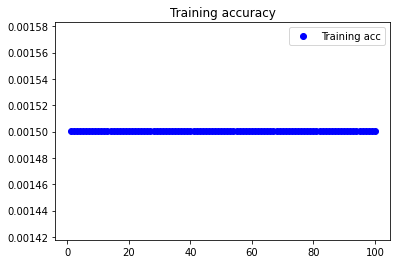

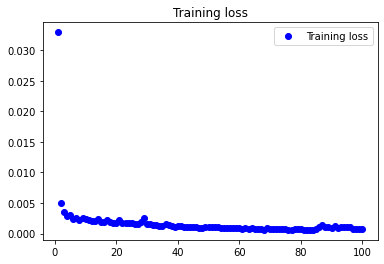

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

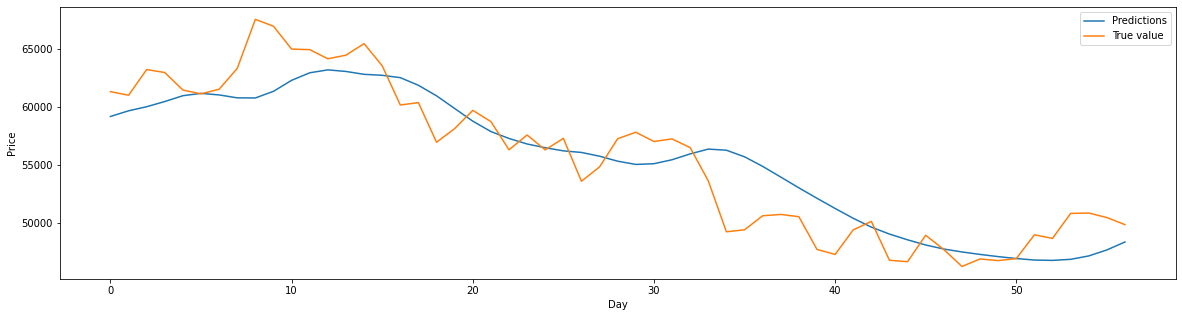

In [ ]:
prediction = model.predict(test_x)

plt.figure(figsize=(20,5))

plt.plot(numpy.squeeze(scaler.inverse_transform(prediction)))
plt.plot(numpy.squeeze(scaler.inverse_transform([test_y])))
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(["Predictions", "True value"])

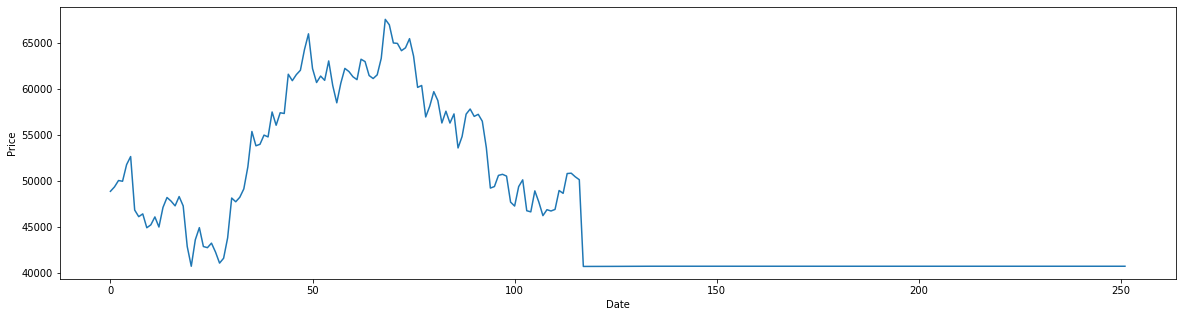

In [ ]:
number_preds_days = 90
plot_data = numpy.squeeze(scaler.inverse_transform(test_info))
shape = test_info.shape[0]
for i in range(number_preds_days):
    future_data = test_info[shape - 60:].T
    future_data = numpy.expand_dims(future_data, axis=2)
    pred = model.predict(future_data)
    test_info = numpy.concatenate((test_info, pred))
plt.figure(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data)

# Q2.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy
import os.path
import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, Dense, RepeatVector


alphabet="abcdefghijklmnopqrstuvwxyz "
data = open('/content/drive/MyDrive/enc-dec.txt','r').read().split('\n')

x_train = numpy.zeros((len(data), 10, 27))
y_train = numpy.zeros((len(data), 10, 27))

for i in range(len(data)):
    temp_data = data[i].split('\t')
    
    diff = 10 - len(temp_data[1])
    temp_data[0] += diff * ' '
    temp_data[1] += diff * ' '
    
    for j in range(10):
        x_train[i, j, alphabet.find(temp_data[0][j])] = 1
        y_train[i, j, alphabet.find(temp_data[1][j])] = 1

x_train.shape, y_train.shape

((152273, 10, 27), (152273, 10, 27))

In [ ]:
enc_sentence = "onmltsrqpoihgrezcba lknrvjihgfueiizltflk"
splited = []

for i in range(0, len(enc_sentence), 10):
    splited.append(enc_sentence[i:i + 10])

x_test = numpy.zeros((len(splited), 10, 27))

for i in range(len(splited)):
    for j in range(10):
        x_test[i, j, alphabet.find(splited[i][j])] = 1

epoch = 0
while os.path.isfile('/content/drive/MyDrive/HW12/question_two_epoch_' + str(epoch + 1) + '.h5'):
    epoch += 1
    
if epoch == 0:
    model = Sequential(name='question_two',
    layers=[tensorflow.keras.layers.GRU(units=128, input_shape=(10, 27)),
            tensorflow.keras.layers.RepeatVector(10),
            tensorflow.keras.layers.GRU(units=128, return_sequences=True),
            tensorflow.keras.layers.Dense(units=27, activation='softmax')])

else:
    model = load_model('/content/drive/MyDrive/HW12/question_two_epoch_' + str(epoch) + '.h5')


model.compile('adam', 'mean_squared_error', metrics=['accuracy'])
history = model.fit(x_train, y_train, 32,
                    callbacks=tensorflow.keras.callbacks.\
                    TensorBoard(log_dir='logs/model'))


model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
for i in range(epoch, 10):
    print('Epoch ' + str(i + 1) + '/' + str(10))
    history = model.fit(x_train, y_train, 32,
                        callbacks=tensorflow.keras.callbacks.\
                        TensorBoard(log_dir='logs/model'))
    model.save('/content/drive/MyDrive/HW12/question_two_epoch_'\
               + str(i + 1) + '.h5')

model.evaluate(x_train, y_train)

4759/4759 [==============================] - 106s 21ms/step - loss: 0.0281 - accuracy: 0.3135
Epoch 1/10
4759/4759 [==============================] - 106s 21ms/step - loss: 1.5484 - accuracy: 0.5333
Epoch 2/10
4759/4759 [==============================] - 102s 22ms/step - loss: 0.6995 - accuracy: 0.7787
Epoch 3/10
4759/4759 [==============================] - 102s 21ms/step - loss: 0.3895 - accuracy: 0.8803
Epoch 4/10
4759/4759 [==============================] - 102s 21ms/step - loss: 0.2722 - accuracy: 0.9181
Epoch 5/10
4759/4759 [==============================] - 102s 21ms/step - loss: 0.2213 - accuracy: 0.9336
Epoch 6/10
4759/4759 [==============================] - 103s 22ms/step - loss: 0.1949 - accuracy: 0.9417
Epoch 7/10
4759/4759 [==============================] - 105s 22ms/step - loss: 0.1774 - accuracy: 0.9468
Epoch 8/10
4759/4759 [==============================] - 103s 22ms/step - loss: 0.1666 - accuracy: 0.9498
Epoch 9/10
4759/4759 [==============================] - 105s 22ms/

[0.1411917507648468, 0.9574047923088074]

In [ ]:
pred = model.predict(x_test)
    
sentence = []
for i in range(pred.shape[0]):
    for j in range(pred.shape[1]):
        sentence.append(alphabet[numpy.argmax(pred[i, j])])

str_data = ''
for i in sentence:
  str_data += i
print(str_data)

    z       wlove    qdeep    alearning 


In [ ]:
enc_sentence = "onmltsrqpoihgrezcba lknrvjihgfueiizltflk"
splited = []

for i in range(0, len(enc_sentence), 10):
    splited.append(enc_sentence[i:i + 10])

x_test = numpy.zeros((len(splited), 10, 27))

for i in range(len(splited)):
    for j in range(10):
        x_test[i, j, alphabet.find(splited[i][j])] = 1

epoch = 0
while os.path.isfile('/content/drive/MyDrive/HW12/question_two_extend_epoch_' + str(epoch + 1) + '.h5'):
    epoch += 1
    
if epoch == 0:
    model = Sequential(name='question_two_extend',
    layers=[tensorflow.keras.layers.GRU(100, activation='relu', return_sequences=True,
                                input_shape=(x_train.shape[1], x_train.shape[2])),
     tensorflow.keras.layers.GRU(75, activation='relu', return_sequences=True),
     tensorflow.keras.layers.GRU(27, activation='softmax', return_sequences=True)])

else:
    model = load_model('/content/drive/MyDrive/HW12/question_two_extend_epoch_' + str(epoch) + '.h5')


model.compile('adam', 'mean_squared_error', metrics=['accuracy'])
history = model.fit(x_train, y_train, 32,
                    callbacks=tensorflow.keras.callbacks.\
                    TensorBoard(log_dir='logs/model'))


model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
for i in range(epoch, 10):
    print('Epoch ' + str(i + 1) + '/' + str(10))
    history = model.fit(x_train, y_train, 32,
                        callbacks=tensorflow.keras.callbacks.\
                        TensorBoard(log_dir='logs/model'))
    model.save('/content/drive/MyDrive/HW12/question_two_extend_epoch_'\
               + str(i + 1) + '.h5')

model.evaluate(x_train, y_train)

4759/4759 [==============================] - 105s 21ms/step - loss: 0.0115 - accuracy: 0.7513
Epoch 1/10
4759/4759 [==============================] - 105s 21ms/step - loss: 0.2689 - accuracy: 0.9357
Epoch 2/10
4759/4759 [==============================] - 101s 21ms/step - loss: 0.2368 - accuracy: 0.9445
Epoch 3/10
4759/4759 [==============================] - 99s 21ms/step - loss: 0.2317 - accuracy: 0.9462
Epoch 4/10
4759/4759 [==============================] - 100s 21ms/step - loss: 0.2298 - accuracy: 0.9467
Epoch 5/10
4759/4759 [==============================] - 103s 22ms/step - loss: 0.2279 - accuracy: 0.9470
Epoch 6/10
4759/4759 [==============================] - 103s 22ms/step - loss: 0.2262 - accuracy: 0.9475
Epoch 7/10
4759/4759 [==============================] - 100s 21ms/step - loss: 0.2188 - accuracy: 0.9506
Epoch 8/10
4759/4759 [==============================] - 108s 23ms/step - loss: 0.2124 - accuracy: 0.9529
Epoch 9/10
4759/4759 [==============================] - 103s 22ms/s

[0.2111031860113144, 0.9531919360160828]

In [ ]:
pred = model.predict(x_test)
    
sentence = []
for i in range(pred.shape[0]):
    for j in range(pred.shape[1]):
        sentence.append(alphabet[numpy.argmax(pred[i, j])])

str_data = ''
for i in sentence:
  str_data += i
print(str_data)

    i        love     deep     learning 
